# Виправлення візуалізації даних


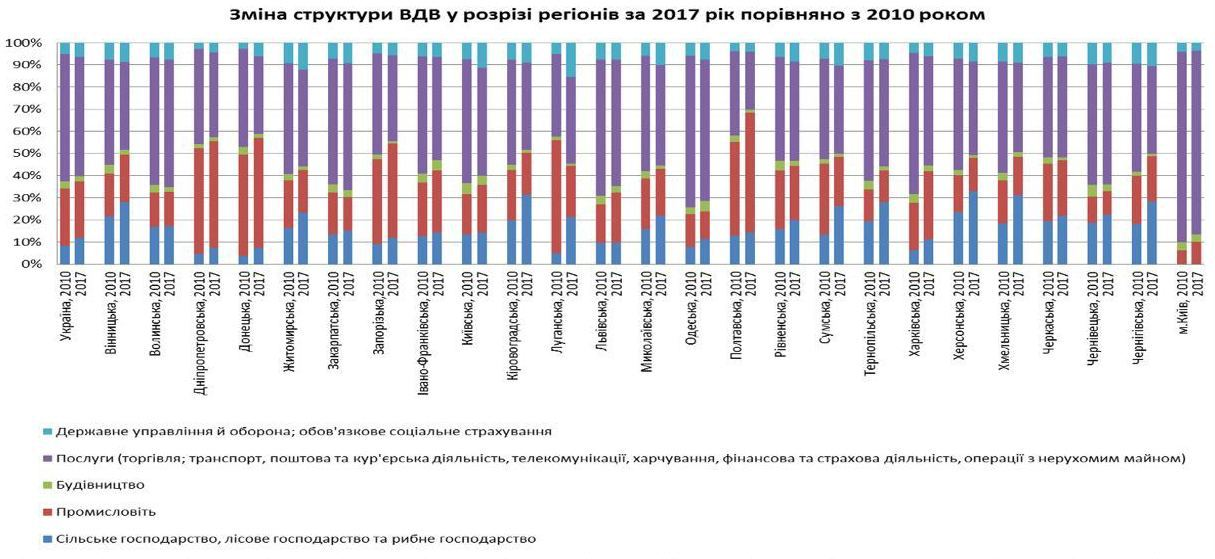

In [1]:
import pandas as pd
import altair as alt
from datetime import datetime
from altair import datum
import geopandas as gpd

In [2]:
df = pd.read_excel('1.4_02.xlsx')
df.head()

,"Регіон, рік",сільське господарство,промисловість,будівництво,послуги,державне управління
0,"Україна, 2010",8.3,25.9,3.3,57.3,5.2
1,"Україна, 2017",12.1,25.2,2.5,53.7,6.5
2,"Вінницька, 2010",21.6,19.3,4.1,47.4,7.6
3,"Вінницька, 2017",28.1,21.4,2.0,39.8,8.7
4,"Волинська, 2010",16.9,15.6,3.2,57.7,6.6


In [3]:
df[['Регіон','Рік']] = df['Регіон, рік'].str.split(', |,',expand=True)
df.head()

,"Регіон, рік",сільське господарство,промисловість,будівництво,послуги,державне управління,Регіон,Рік
0,"Україна, 2010",8.3,25.9,3.3,57.3,5.2,Україна,2010
1,"Україна, 2017",12.1,25.2,2.5,53.7,6.5,Україна,2017
2,"Вінницька, 2010",21.6,19.3,4.1,47.4,7.6,Вінницька,2010
3,"Вінницька, 2017",28.1,21.4,2.0,39.8,8.7,Вінницька,2017
4,"Волинська, 2010",16.9,15.6,3.2,57.7,6.6,Волинська,2010


In [4]:
df = df.iloc[: , 1:]
df

,сільське господарство,промисловість,будівництво,послуги,державне управління,Регіон,Рік
0,8.3,25.9,3.3,57.3,5.2,Україна,2010
1,12.1,25.2,2.5,53.7,6.5,Україна,2017
2,21.6,19.3,4.1,47.4,7.6,Вінницька,2010
3,28.1,21.4,2.0,39.8,8.7,Вінницька,2017
4,16.9,15.6,3.2,57.7,6.6,Волинська,2010
5,17.2,15.4,2.1,57.7,7.6,Волинська,2017
6,4.7,47.7,1.8,43.1,2.7,Дніпропетровська,2010
7,7.3,48.2,1.8,38.4,4.3,Дніпропетровська,2017
8,3.8,45.8,3.3,44.4,2.7,Донецька,2010
9,7.2,49.9,1.7,35.0,6.2,Донецька,2017


In [21]:
df10 = df[df['Рік']=='2010']
df10 = df10.sort_values('сільське господарство')
df10.head()

,сільське господарство,промисловість,будівництво,послуги,державне управління,Регіон,Рік
50,0.0,6.2,3.6,86.2,4.0,м.Київ,2010
8,3.8,45.8,3.3,44.4,2.7,Донецька,2010
6,4.7,47.7,1.8,43.1,2.7,Дніпропетровська,2010
22,5.0,51.0,1.7,37.3,5.0,Луганська,2010
38,6.4,21.4,3.9,63.7,4.6,Харківська,2010


,сільське господарство,промисловість,будівництво,послуги,державне управління,Регіон,Рік
1,12.1,25.2,2.5,53.7,6.5,Україна,2017
3,28.1,21.4,2.0,39.8,8.7,Вінницька,2017
5,17.2,15.4,2.1,57.7,7.6,Волинська,2017
7,7.3,48.2,1.8,38.4,4.3,Дніпропетровська,2017
9,7.2,49.9,1.7,35.0,6.2,Донецька,2017


In [22]:
df10_m = pd.melt(df10, id_vars = ['Регіон'], 
        value_vars=['сільське господарство','промисловість',
                   'будівництво','послуги','державне управління'],
                var_name='Sources', value_name='Total')
df10_m.head()



,Регіон,Sources,Total
0,м.Київ,сільське господарство,0.0
1,Донецька,сільське господарство,3.8
2,Дніпропетровська,сільське господарство,4.7
3,Луганська,сільське господарство,5.0
4,Харківська,сільське господарство,6.4


In [31]:
chart1 = alt.Chart(df10_m.sort_values('Total'),title='2010 рік').mark_bar().encode(
    x = alt.X('Total'),
    y = alt.Y('Регіон'),
    color = alt.Color('Sources'),
    tooltip = alt.Tooltip('Total')
)
chart1

alt.Chart(...)

In [32]:
df17 = df[df['Рік']=='2017']

df17.head()

,сільське господарство,промисловість,будівництво,послуги,державне управління,Регіон,Рік
1,12.1,25.2,2.5,53.7,6.5,Україна,2017
3,28.1,21.4,2.0,39.8,8.7,Вінницька,2017
5,17.2,15.4,2.1,57.7,7.6,Волинська,2017
7,7.3,48.2,1.8,38.4,4.3,Дніпропетровська,2017
9,7.2,49.9,1.7,35.0,6.2,Донецька,2017


In [33]:
df17_m = pd.melt(df17, id_vars = ['Регіон'], 
        value_vars=['сільське господарство','промисловість',
                   'будівництво','послуги','державне управління'],
                var_name='Sources', value_name='Total')
df17_m.head()

,Регіон,Sources,Total
0,Україна,сільське господарство,12.1
1,Вінницька,сільське господарство,28.1
2,Волинська,сільське господарство,17.2
3,Дніпропетровська,сільське господарство,7.3
4,Донецька,сільське господарство,7.2


In [34]:
chart2 = alt.Chart(df17_m.sort_values('Total'),title='2017 рік').mark_bar().encode(
    x = alt.X('Total'),
    y = alt.Y('Регіон'),
    color = alt.Color('Sources'),
    tooltip = alt.Tooltip('Total')
)
chart2

alt.Chart(...)